# Loan Default Risk Analysis

#### Worked on by Mohammed Feroz K and Gunjan Singh



#### This project aims to identify risky loan applicants through exploratory data analysis (EDA) to reduce credit loss for an online loan marketplace.


## General Information
- This project focuses on a leading online loan marketplace that offers personal loans, business loans, and financing for medical procedures. The platform allows borrowers to access lower interest rate loans through a fast online interface.
- The business problem addressed is the significant credit loss incurred by lending to risky applicants. Credit loss occurs when borrowers default on their loans, particularly those labeled as 'charged-off.'
- The dataset used contains complete loan data for all loans issued between 2007 and 2011, which provides insights into the factors contributing to loan defaults.


### Import necessary libraries


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

In [20]:
df = pd.read_csv('loan.csv')

/var/folders/yg/k0p855s544x71f7f36lrvn9c0000gp/T/ipykernel_12808/129683778.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


### Fixing Column 47

In [24]:
date_format = '%b-%y'
df[df.columns[47]] = pd.to_datetime(df[df.columns[47]], errors='coerce', format=date_format)

### Set up a custom color palette


In [81]:
custom_palette = sns.color_palette("Set2")  # Or any valid Seaborn palette



# Exploratory Data Analysis (EDA) of Loan Dataset

## 1. Missing Values Analysis
#### Identifying missing values is the first step in data cleaning. This step helps identify which columns require attention and how much data is missing.

In [35]:
# Display the first few rows of the dataset to understand its structure
print(df.head())

# Check the shape of the dataset
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Get information about the columns, data types, and missing values
print("\nDataset Info:")
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print(f"\nMissing values in the dataset:\n{missing_values}")

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [52]:
# Set a threshold to drop columns with more than 90% missing values
threshold = 0.9 * df.shape[0]

# Drop columns with more than 90% missing values
df_cleaned = df.dropna(thresh=threshold, axis=1)

#droppping columns with all null or with same value throughout
df_cleaned=df_cleaned[df_cleaned.columns[df_cleaned.nunique() >1 ]]

# Check for remaining missing values after removing columns
remaining_missing = df_cleaned.isnull().sum()

# Display columns with missing values and their count
print(f"Remaining columns with missing values:\n{remaining_missing[remaining_missing > 0]}")
df=df_cleaned

Remaining columns with missing values:
emp_title               2459
emp_length              1075
title                     11
revol_util                50
last_pymnt_d              71
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64


In [54]:
categorical = df[df.columns[df.nunique() < 15]]
for col in categorical.columns:
    print(categorical[col].value_counts())
    print('------------------')

term
36 months    29096
60 months    10621
Name: count, dtype: int64
------------------
grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64
------------------
emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64
------------------
home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64
------------------
verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64
------------------
loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64
------------------
purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976



## 2. Categorical Data Analysis
#### Visualizing the distribution of categorical variables such as loan grade, home ownership, and verification status provides insights into borrower characteristics and how they relate to loan risk.


/var/folders/yg/k0p855s544x71f7f36lrvn9c0000gp/T/ipykernel_12808/865213658.py:6: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.countplot(y='loan_status', hue='grade', data=df,hue_order=sorted_subcategories, palette=custom_palette)


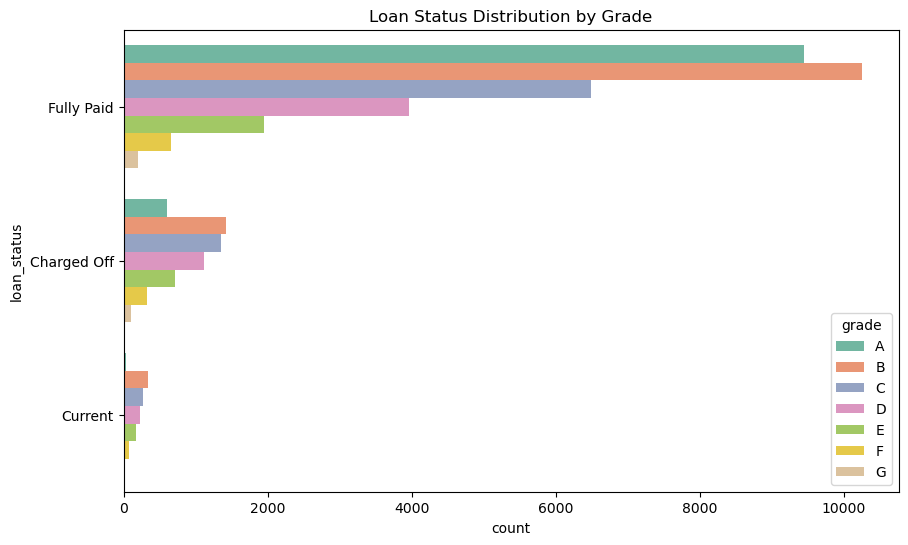

In [83]:
# Count plot for Loan Status by Grade

sorted_subcategories = sorted(df['grade'].unique())

plt.figure(figsize=(10, 6))
sns.countplot(y='loan_status', hue='grade', data=df,hue_order=sorted_subcategories, palette=custom_palette)
plt.title('Loan Status Distribution by Grade')
plt.show()

/var/folders/yg/k0p855s544x71f7f36lrvn9c0000gp/T/ipykernel_12808/4254878576.py:4: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.barplot(y='grade',x='percentage',hue='loan_status' , data=g1 ,palette=custom_palette)


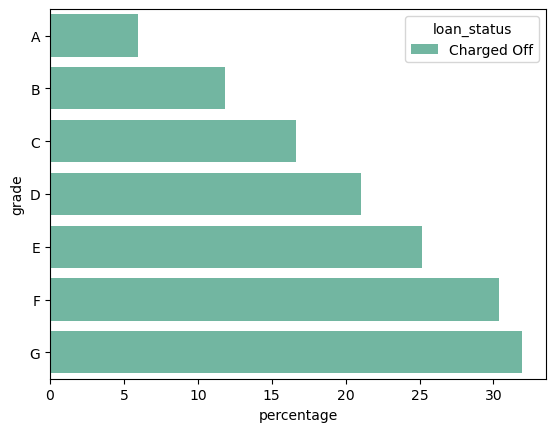

In [86]:
grouped=df.groupby([df.grade,df.loan_status]).size().reset_index(name='count')
grouped['percentage']=grouped.groupby('grade')['count'].transform(lambda x:x/x.sum() *100 )
g1=grouped[grouped.loan_status.eq('Charged Off')]
sns.barplot(y='grade',x='percentage',hue='loan_status' , data=g1 ,palette=custom_palette)
plt.show()

### Insight:
- **Loan Status**: Charged-off loans are more frequent in lower grades (E, F, G), while fully paid loans dominate higher grades (A, B).


/var/folders/yg/k0p855s544x71f7f36lrvn9c0000gp/T/ipykernel_12808/2652275986.py:3: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(y='home_ownership', hue='loan_status', data=df, palette=custom_palette)


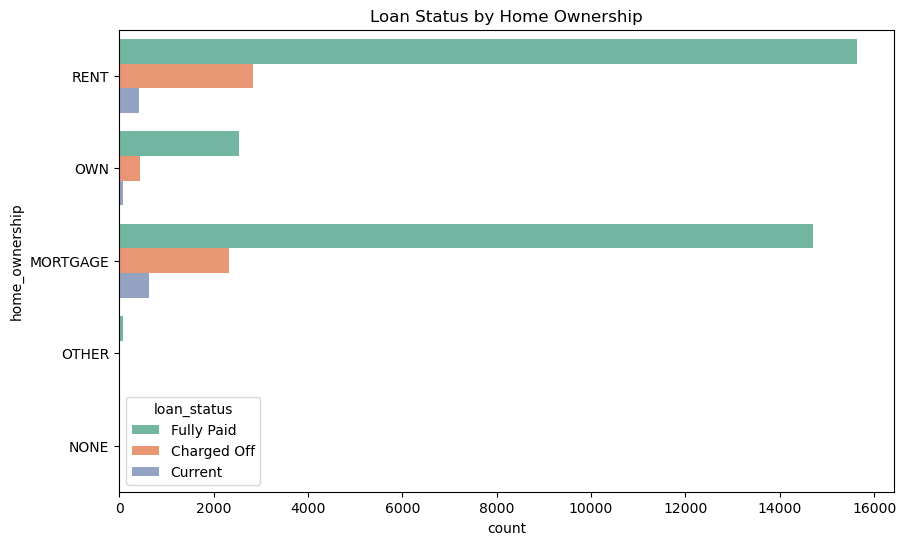

In [91]:
# Count plot for Loan Status by Home Ownership
plt.figure(figsize=(10, 6))
sns.countplot(y='home_ownership', hue='loan_status', data=df, palette=custom_palette)
plt.title('Loan Status by Home Ownership')
plt.show()

### Insight:
- **Home Ownership**: Mortgage and rental properties are associated with higher-risk loans, as indicated by higher counts of charged-off statuses.

/var/folders/yg/k0p855s544x71f7f36lrvn9c0000gp/T/ipykernel_12808/1830049517.py:5: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.countplot(y='verification_status', hue='grade', data=df, palette=custom_palette,hue_order=sorted_subcategories)


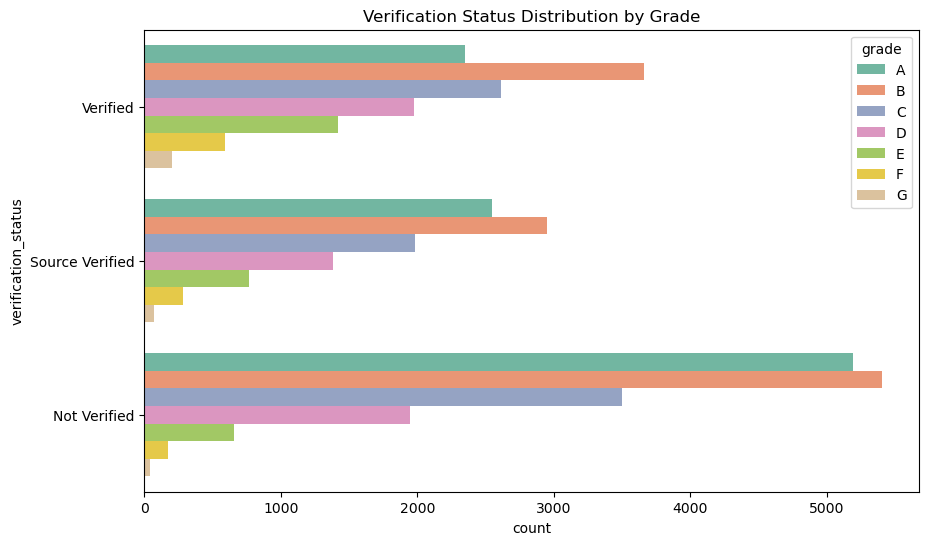

In [98]:
# Count plot for Verification Status by Grade
sorted_subcategories = sorted(df['grade'].unique())

plt.figure(figsize=(10, 6))
sns.countplot(y='verification_status', hue='grade', data=df, palette=custom_palette,hue_order=sorted_subcategories)
plt.title('Verification Status Distribution by Grade')
plt.show()

/var/folders/yg/k0p855s544x71f7f36lrvn9c0000gp/T/ipykernel_12808/914341901.py:3: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(y='verification_status',x='percentage',hue='loan_status' , data=grouped ,palette=custom_palette)


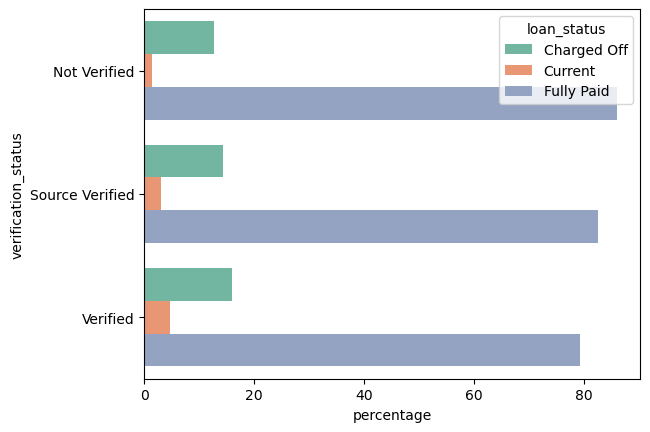

In [104]:
grouped=df.groupby([df.verification_status,df.loan_status]).size().reset_index(name='count')
grouped['percentage']=grouped.groupby('verification_status')['count'].transform(lambda x:x/x.sum() *100 )
sns.barplot(y='verification_status',x='percentage',hue='loan_status' , data=grouped ,palette=custom_palette)
plt.show()

### Insight:
- **Verification Status**: The results are ambiguous.

## 3. Numerical Data Analysis
#### Analyzing numerical columns such as `loan_amnt`, `int_rate`, and others to understand their distributions. Visualizations like histograms and box plots help identify any potential skew or outliers in the data.

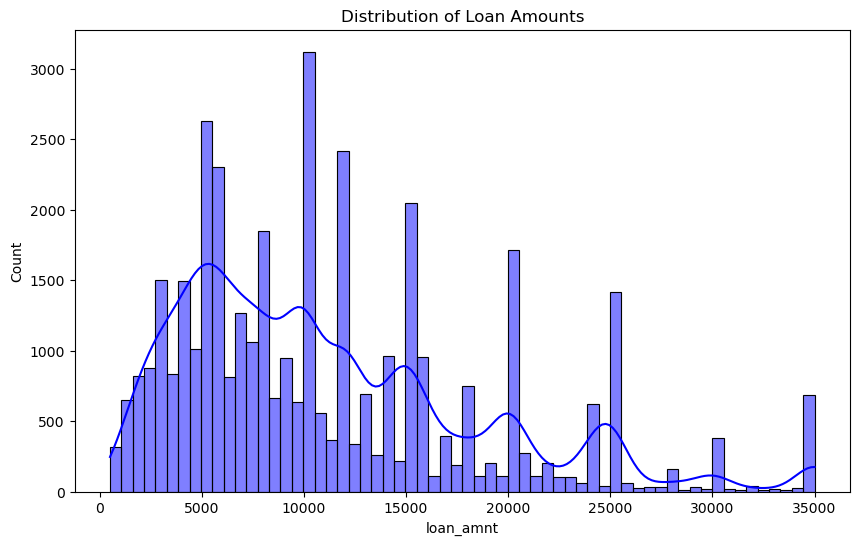

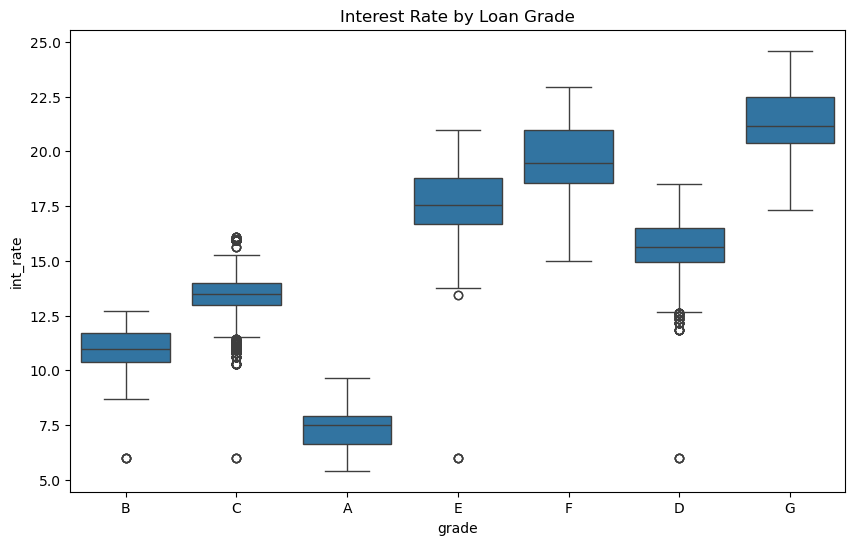

In [180]:
# Histogram of Loan Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'], kde=True, color='blue')
plt.title('Distribution of Loan Amounts')
plt.show()

df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)

# Boxplot of Interest Rates by Grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='int_rate', data=df)
plt.title('Interest Rate by Loan Grade')
plt.show()

### Insights from Numerical Data:
- **Loan Amount**: The distribution of loan amounts shows a wide range, with most loans falling in the lower range.
- **Interest Rates**: Higher loan grades (A, B) tend to have lower interest rates, while lower grades (E, F, G) have higher rates. This suggests a correlation between risk and interest rates.


## 4. Loan Purpose Analysis
#### Analyzing the purpose of loans can reveal which categories are more likely to default and may indicate borrower behavior.


/var/folders/yg/k0p855s544x71f7f36lrvn9c0000gp/T/ipykernel_12808/2212705442.py:3: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(y='purpose',x='percentage',hue='loan_status' , data=grouped , palette=custom_palette)


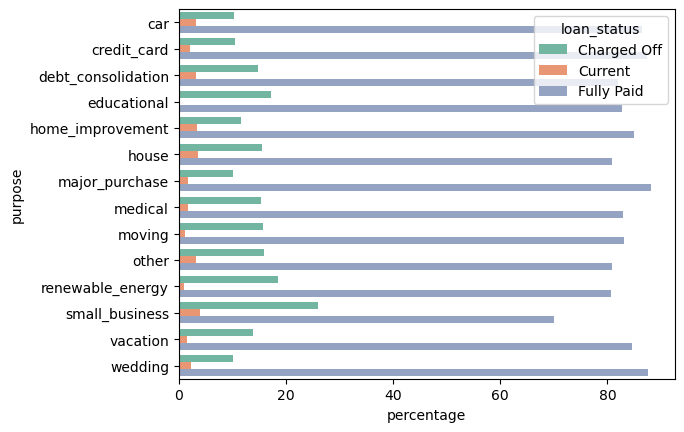

In [107]:
# Count plot for Loan Purpose by Grade
grouped=df.groupby([df.purpose,df.loan_status]).size().reset_index(name='count')
grouped['percentage']=grouped.groupby('purpose')['count'].transform(lambda x:x/x.sum() *100 )
sns.barplot(y='purpose',x='percentage',hue='loan_status' , data=grouped , palette=custom_palette)
plt.show()

### Insight:
- **Small Businesses**: Loans for small businesses are more likely to default.

## 5. Delinquencies and Inquiries Analysis
#### Exploring delinquency and inquiry counts to assess their correlation with loan risk.


/var/folders/yg/k0p855s544x71f7f36lrvn9c0000gp/T/ipykernel_12808/3679375614.py:3: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.countplot(y='delinq_2yrs', hue='grade', data=df, palette=custom_palette)


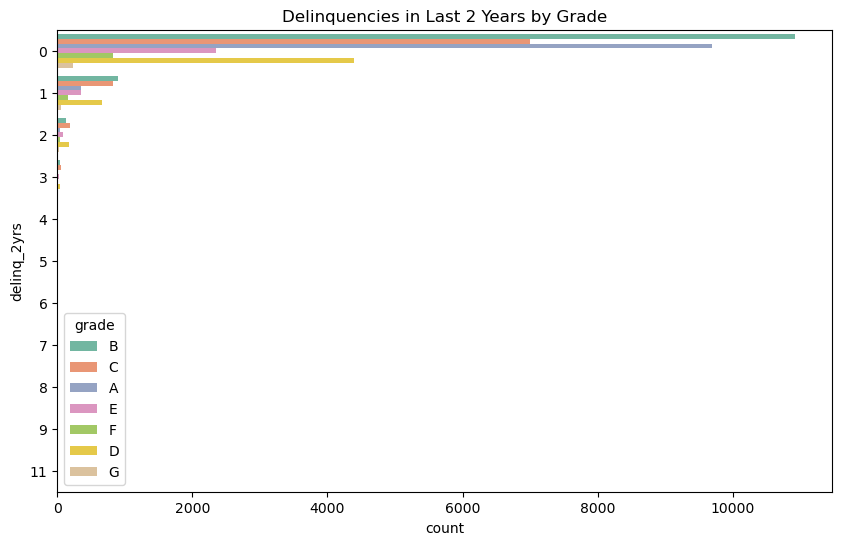

/var/folders/yg/k0p855s544x71f7f36lrvn9c0000gp/T/ipykernel_12808/3679375614.py:9: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.countplot(y='inq_last_6mths', hue='grade', data=df, palette=custom_palette)


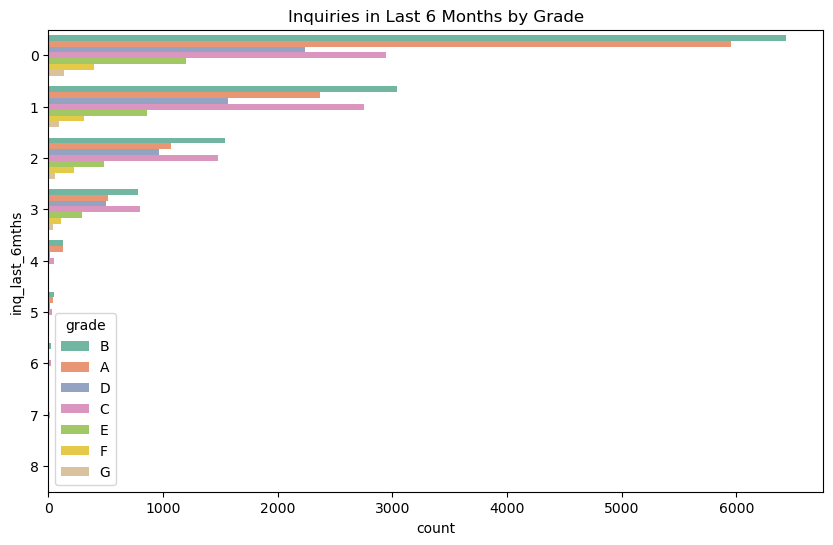

In [117]:
# Count plot for Delinquencies in Last 2 Years by Grade
plt.figure(figsize=(10, 6))
sns.countplot(y='delinq_2yrs', hue='grade', data=df, palette=custom_palette)
plt.title('Delinquencies in Last 2 Years by Grade')
plt.show()

# Count plot for Inquiries in Last 6 Months by Grade
plt.figure(figsize=(10, 6))
sns.countplot(y='inq_last_6mths', hue='grade', data=df, palette=custom_palette)
plt.title('Inquiries in Last 6 Months by Grade')
plt.show()

### Insights:
- **Delinquencies**: Higher delinquency counts in the past two years are concentrated in lower grades (E, F, G), indicating greater default risk.
- **Inquiries**: Borrowers with a higher number of inquiries in the last six months also tend to have lower grades, reflecting increased risk.

## 6. Heatmap of Verification Status vs. Grade
#### This heatmap shows the relationship between verification status and loan grade.

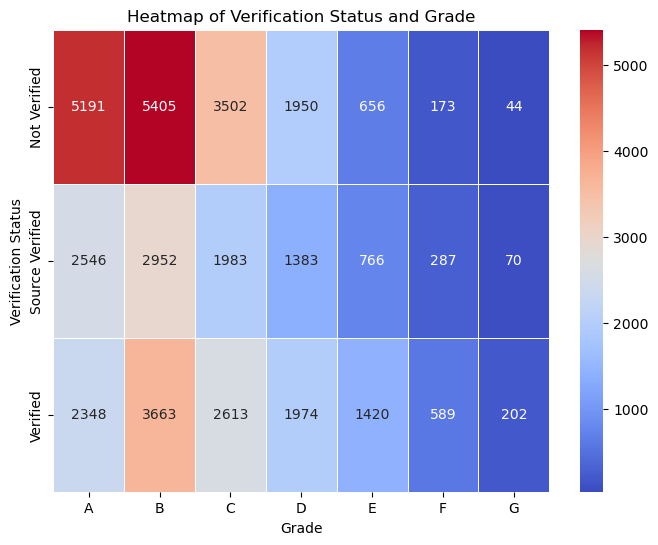

In [127]:
# Heatmap of Verification Status vs Grade
pivot_table = df.pivot_table(index='verification_status', columns='grade', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, fmt='d')
plt.title('Heatmap of Verification Status and Grade')
plt.xlabel('Grade')
plt.ylabel('Verification Status')
plt.show()


### Insight:
- **Verification Status**: Loans with unverified income tend to be more common in lower grades, reinforcing the connection between verification and risk.


## 7. Loan Amount Distribution by Verification Status
#### A box plot comparing loan amounts across different verification statuses to see if unverified loans have higher amounts.


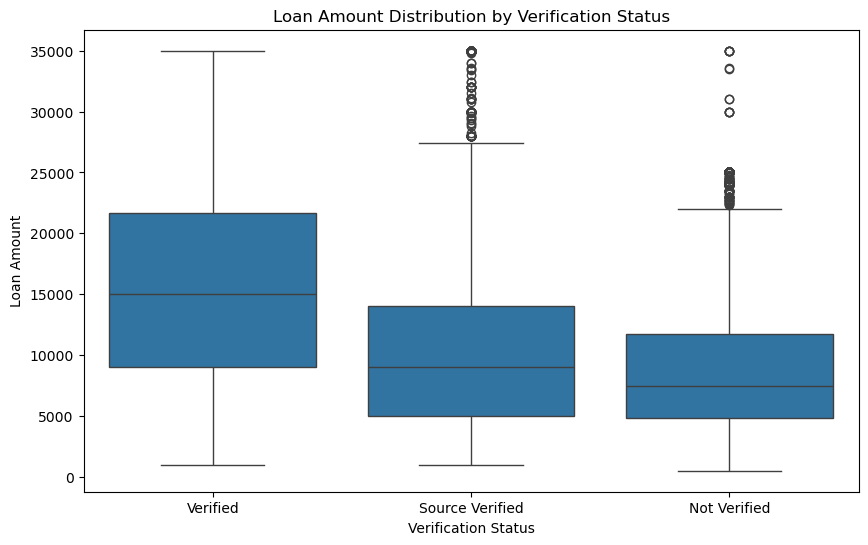

In [134]:
# Boxplot of Loan Amount by Verification Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='verification_status', y='loan_amnt', data=df)
plt.title('Loan Amount Distribution by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Loan Amount')
plt.show()

### Insight:
- **Loan Amount**: Self-reported (unverified) borrowers tend to take out larger loans, which may be riskier due to the lack of proper income verification.

## 8. Public Records and Default Risk
#### This section explores the relationship between public records (e.g., bankruptcies) and loan default rates.


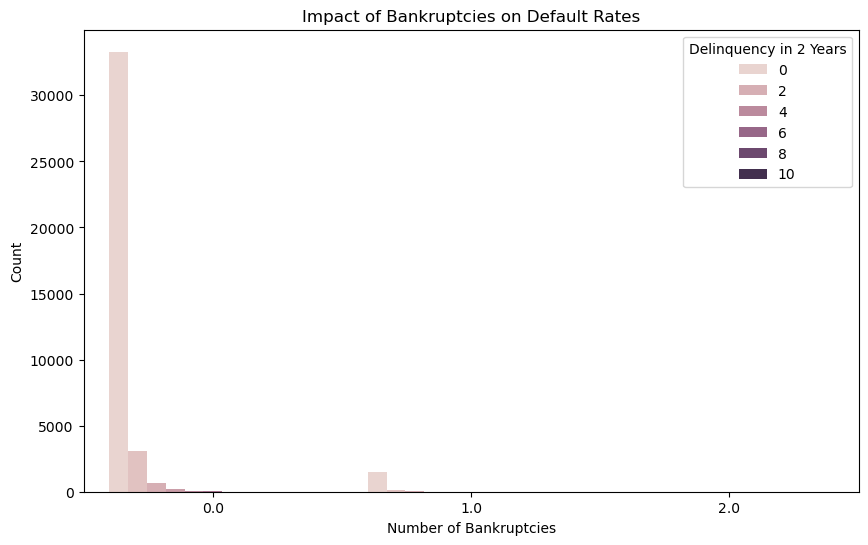

In [141]:
# Count plot for Public Records Bankruptcies and Delinquency
plt.figure(figsize=(10, 6))
sns.countplot(x='pub_rec_bankruptcies', hue='delinq_2yrs', data=df)
plt.title('Impact of Bankruptcies on Default Rates')
plt.xlabel('Number of Bankruptcies')
plt.ylabel('Count')
plt.legend(title='Delinquency in 2 Years')
plt.show()

### Insight:
- **Public Records**: Borrowers with public records, such as bankruptcies, are at a significantly higher risk of defaulting. This highlights the importance of conducting thorough background checks.

## 9. Term Analysis
This section analyzes which durations of loans are more likely to default

/var/folders/yg/k0p855s544x71f7f36lrvn9c0000gp/T/ipykernel_12808/583368930.py:3: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(y='term',x='percentage',hue='loan_status' , data=grouped ,palette=custom_palette)


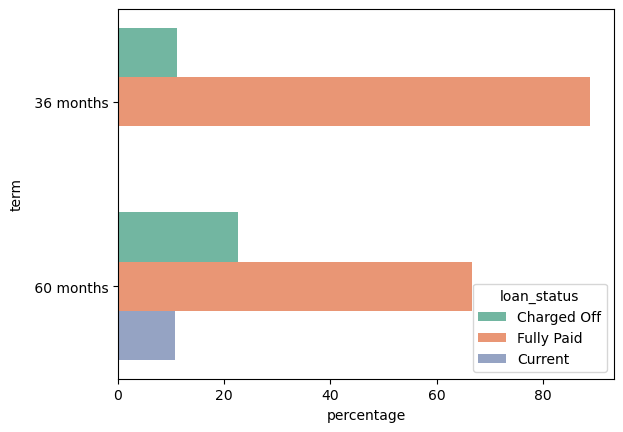

In [150]:
grouped=df.groupby([df.term,df.loan_status]).size().reset_index(name='count')
grouped['percentage']=grouped.groupby('term')['count'].transform(lambda x:x/x.sum() *100 )
sns.barplot(y='term',x='percentage',hue='loan_status' , data=grouped ,palette=custom_palette)
plt.show()

### Insight:
- **Term**: Longer term loans are about 10% more likely to default

## 10. Group By Analysis
This section analyzes average loan amounts based on loan grade to see if higher grades correlate with lower loan amounts.

In [159]:
# Group by loan grade and calculate the mean loan amount
mean_loan_by_grade = df.groupby('grade')['loan_amnt'].mean()
print(mean_loan_by_grade)

grade
A     8624.928111
B    11119.080699
C    11004.670906
D    12278.198606
E    15847.255454
F    18363.298379
G    20226.819620
Name: loan_amnt, dtype: float64


### Insight:
- **Loan Amount by Grade**: Higher-grade loans tend to have lower average loan amounts, while lower grades (E, F, G) have significantly larger loans, which could indicate higher risk.

## **Insights:**

1. **Loan Grade Distribution:**
   - Higher-grade loans (A, B) tend to have lower interest rates, while lower-grade loans (E, F, G) come with significantly higher interest rates. This is expected, as riskier loans demand higher returns for lenders.
   - Loan amounts increase with lower grades, with grade G loans having the highest average loan amounts. This suggests that higher-risk borrowers tend to take out larger loans, which could contribute to higher default rates.

2. **Home Ownership and Risk:**
   - Borrowers with mortgages or rental properties make up a significant portion of the dataset and tend to be associated with higher loan grades (C, D, E). This could indicate a higher risk profile for borrowers who do not fully own their homes.
   - Borrowers who fully own their homes are less frequent but tend to receive higher grades, indicating lower-risk profiles.

3. **Verification Status and Loan Grade:**
   - Loans with **verified income** are more common in higher grades (A, B), while **unverified income** borrowers dominate lower grades (D, E, F).
   - This implies that unverified income is a strong indicator of increased risk and may be correlated with a higher likelihood of default.

4. **Loan Purpose and Default Risk:**
   - **Debt consolidation loans** are the most common purpose but also carry the highest risk, as indicated by the large volume of lower-grade loans in this category. This suggests that individuals consolidating debt may already be in financial distress.
   - Loans for purposes such as **small business** and **home improvement** also feature higher-risk grades, indicating the economic unpredictability associated with these loan types.

5. **Delinquencies and Default Risk:**
   - Borrowers with a history of delinquencies in the past two years show a higher likelihood of loan default. These loans are more frequently categorized into the lower grade (E, F, G), reinforcing the connection between delinquencies and risk.
   - Multiple credit inquiries in the last 6 months also correlate with lower loan grades, indicating that borrowers seeking multiple lines of credit might be financially unstable.

6. **Public Records and Defaults:**
   - Negative public records, such as bankruptcies, significantly impact a borrower’s ability to secure higher loan grades. Borrowers with one or more bankruptcies are more likely to receive grades in the lower spectrum (D, E, F), and they exhibit higher default rates.

7. **Loan Status by Grade:**
   - Defaulted loans (charged-off, late) tend to cluster in lower grades (D, E, F, G). This is consistent with the expectation that higher-risk loans lead to higher default rates.
   - The presence of **fully paid loans** is concentrated more in the higher grades (A, B, C), highlighting the effectiveness of risk assessment in grading loans.

## **Conclusions:**

1. **Income Verification is Crucial:**
   - Loans with **unverified income** show a clear pattern of higher risk and lower grades. Ensuring that borrowers' income is properly verified is a crucial step in mitigating loan default risk.

2. **Delinquencies and Credit Inquiries as Risk Indicators:**
   - Historical delinquencies and frequent credit inquiries are strong predictors of loan default. Borrowers who exhibit these patterns should be considered higher risk and may require stricter approval criteria or higher interest rates.

3. **Debt Consolidation Loans Pose a Significant Risk:**
   - While **debt consolidation loans** make up a significant portion of the loan portfolio, they carry higher default rates, especially in lower-grade loans. This suggests that borrowers seeking debt consolidation are often in precarious financial situations, which increases default risk.

4. **Home Ownership and Financial Stability:**
   - Borrowers who own their homes outright tend to secure higher loan grades, reflecting their lower default risk. Conversely, borrowers with mortgages or rental agreements are riskier, possibly due to larger financial obligations.

5. **Public Records are a Key Risk Factor:**
   - Borrowers with bankruptcies and other negative public records have a much higher likelihood of defaulting. Public record checks should be a standard part of loan risk assessment.

## **Recommendations:**

1. **Tighter Verification Processes:**
   - Strengthen the **income verification** process, especially for loans in the mid-to-lower-grade range. Loans with unverified income should either be avoided or subject to stricter terms, such as higher interest rates or smaller loan amounts.

2. **Risk-Based Pricing for Delinquent Borrowers:**
   - Borrowers with a history of delinquencies or multiple credit inquiries should be assessed more rigorously. Consider implementing **risk-based pricing** for these borrowers, including higher interest rates or shorter loan terms to compensate for the elevated risk.

3. **Debt Consolidation Risk Mitigation:**
   - Given the high volume and risk of **debt consolidation loans**, it would be prudent to introduce **targeted risk mitigation strategies** for this category. This could include offering financial counseling to borrowers seeking debt consolidation to reduce default risk or imposing stricter lending criteria for this purpose.

4. **Enhanced Public Record Checks:**
   - Include **public record checks** (such as bankruptcy records) as part of the loan approval process. Borrowers with a history of bankruptcies should face additional scrutiny, and loan terms should be adjusted accordingly to mitigate potential risks.

5. **Loan Caps for Riskier Borrowers:**
   - Implement loan caps for borrowers in the lower-grade (D, E, F, G) categories. By limiting the maximum loan amount available to higher-risk borrowers, the potential for larger losses in case of default can be reduced.

6. **Ongoing Monitoring and Reporting:**
   - Establish a system to **continuously monitor key risk indicators**, such as delinquencies, credit inquiries, and loan grades. This will allow for proactive adjustments to lending strategies and risk management approaches as market conditions change.

7. **Focus on High-Quality Borrowers:**
   - Allocate more resources to attracting and retaining high-quality borrowers (grades A and B) through better interest rates and incentives. This can help to stabilize the portfolio and reduce overall risk exposure.

By addressing the identified risk factors and implementing the recommended strategies, the lending institution can reduce loan default rates, better manage portfolio risk, and ensure a healthier financial outcome.


## Technologies Used
- Pandas - version 1.3.3
- NumPy - version 1.21.2
- Scikit-learn - version 0.24.2
- Matplotlib - version 3.4.3
- Seaborn - version 0.11.2


## Acknowledgements
- This project was inspired by the need for improved risk assessment strategies in lending.


## Contact
Created by [@Gunjan-lab-test] - feel free to contact me!